# Лабораторная работа № 7
## Автоассоциативные сети с узким горлом

### Воронов К.М., М8О-407Б-19

Цель работы: исследование свойств автоассоциативных сетей с узким горлом, алгоритмов обучения, а также применение сетей для выполнения линейного и нелинейного анализа главных компонент набора данных.


 Вариант 19

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

In [ ]:
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [ ]:
data = datasets.CIFAR10(
    root = "data", train = False, download = True, transform = ToTensor()
)

Files already downloaded and verified


In [ ]:
class_type = 9

In [ ]:
images = []

for img, label in data:
    if label == class_type:
        images.append(img.numpy().transpose(1, 2, 0))
images = np.array(images)
np.random.shuffle(images)

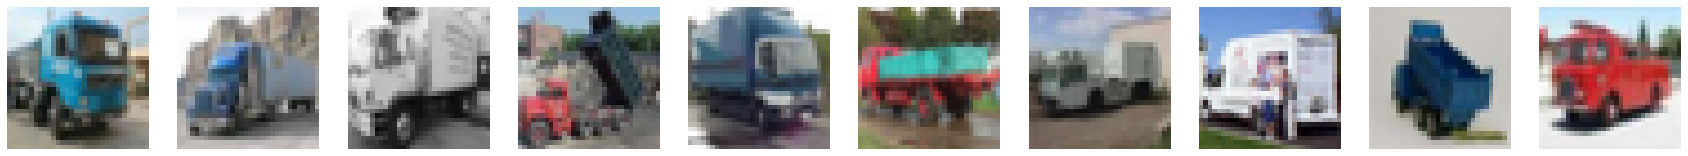

In [ ]:
number_images = 10

figure, ax = plt.subplots(1, number_images, figsize=(3 * number_images, 4))
for i in range(number_images):
    ax[i].axis("off")
    ax[i].imshow((images[i]).astype(np.float64))

plt.show()

In [ ]:
images_tensor = []

for i in range(len(images)):
    images[i] = images[i] * 2 - 1
    images_tensor.append(torch.Tensor(images[i].flatten()))
    images_tensor[i] = images_tensor[i].to(device)

In [ ]:
encoder = nn.Sequential(
    nn.Linear(3072, 1024),
    nn.Tanh(),
    nn.Linear(1024, 512),
    nn.Tanh(),
    nn.Linear(512, 128),
    nn.Tanh(),
).cuda().to(device)

decoder = nn.Sequential(
    nn.Linear(128, 512),
    nn.Tanh(),
    nn.Linear(512, 1024),
    nn.Tanh(),
    nn.Linear(1024, 3072),
    nn.Tanh(),
).cuda().to(device)

In [ ]:
lr = 0.001
epochs = 1050
batch_size = 32
optim_enc = torch.optim.Adam(encoder.parameters(), lr = lr)
optim_dec = torch.optim.Adam(decoder.parameters(), lr = lr)

In [ ]:
dataloader = DataLoader(images_tensor, batch_size = batch_size)

In [ ]:
encoder.train()
decoder.train()
loss_epoch_sum = []
for epoch in range(epochs):
    loss_epoch = 0.0
    for img in dataloader:
        enc = encoder(img)
        dec = decoder(enc)
        loss = torch.nn.MSELoss()(img, dec)
        loss.backward()

        optim_dec.step()
        optim_enc.step()

        optim_dec.zero_grad()
        optim_enc.zero_grad()

        loss_epoch += loss.cpu().detach().item() / len(dataloader)
    loss_epoch_sum.append(loss_epoch) 
    print("Loss ", epoch, " epoch: ", loss_epoch_sum[len(loss_epoch_sum) - 1])

Loss  0  epoch:  0.1787474942393601
Loss  1  epoch:  0.1321283089928329
Loss  2  epoch:  0.11592263518832624
Loss  3  epoch:  0.10827818443067372
Loss  4  epoch:  0.10312776500359178
Loss  5  epoch:  0.0998982188757509
Loss  6  epoch:  0.09718525619246066
Loss  7  epoch:  0.09451376204378903
Loss  8  epoch:  0.09283375577069819
Loss  9  epoch:  0.09293617098592222
Loss  10  epoch:  0.08684870461001992
Loss  11  epoch:  0.0841878951760009
Loss  12  epoch:  0.08088878891430795
Loss  13  epoch:  0.07985917432233691
Loss  14  epoch:  0.07908031879924238
Loss  15  epoch:  0.07661563204601407
Loss  16  epoch:  0.07484941673465073
Loss  17  epoch:  0.07566020963713527
Loss  18  epoch:  0.07464050420094281
Loss  19  epoch:  0.07475306745618582
Loss  20  epoch:  0.07393125689122826
Loss  21  epoch:  0.07395258778706193
Loss  22  epoch:  0.07170037948526442
Loss  23  epoch:  0.06985103676561266
Loss  24  epoch:  0.06756597076309845
Loss  25  epoch:  0.06579231028445065
Loss  26  epoch:  0.064658

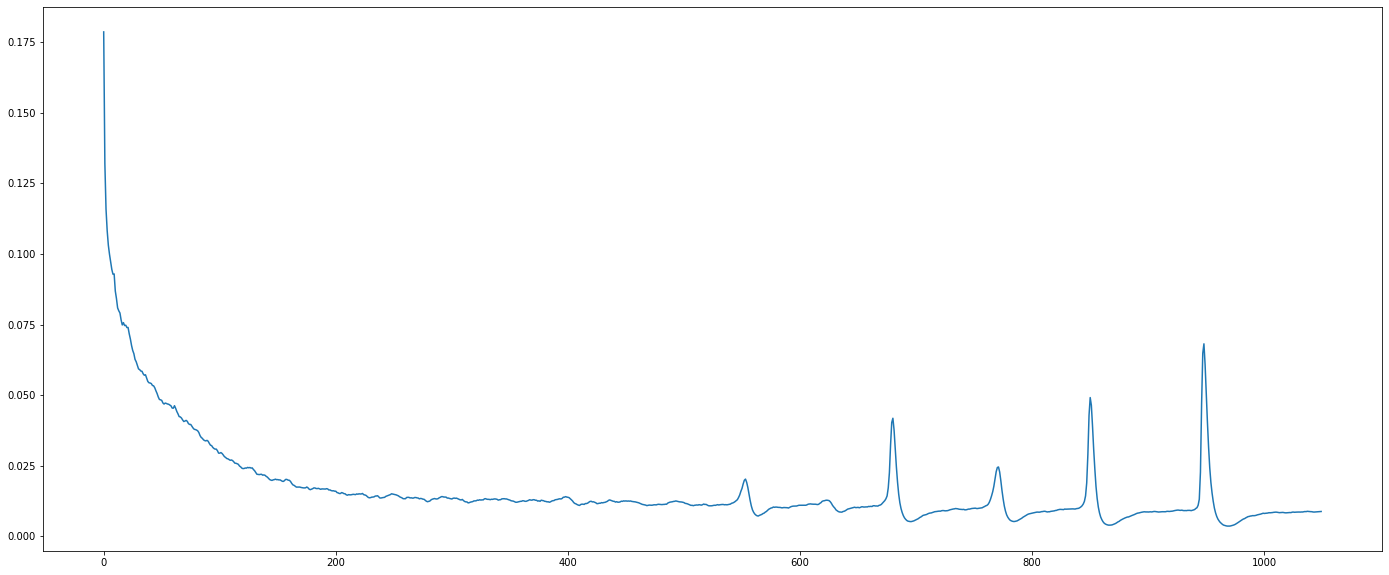

In [ ]:
figure = plt.figure(figsize = (24, 10))

loss_epoch_sum = np.array(loss_epoch_sum)
print()
tt = np.arange(0, epochs, 1)

plt.plot(tt, loss_epoch_sum)
plt.show()

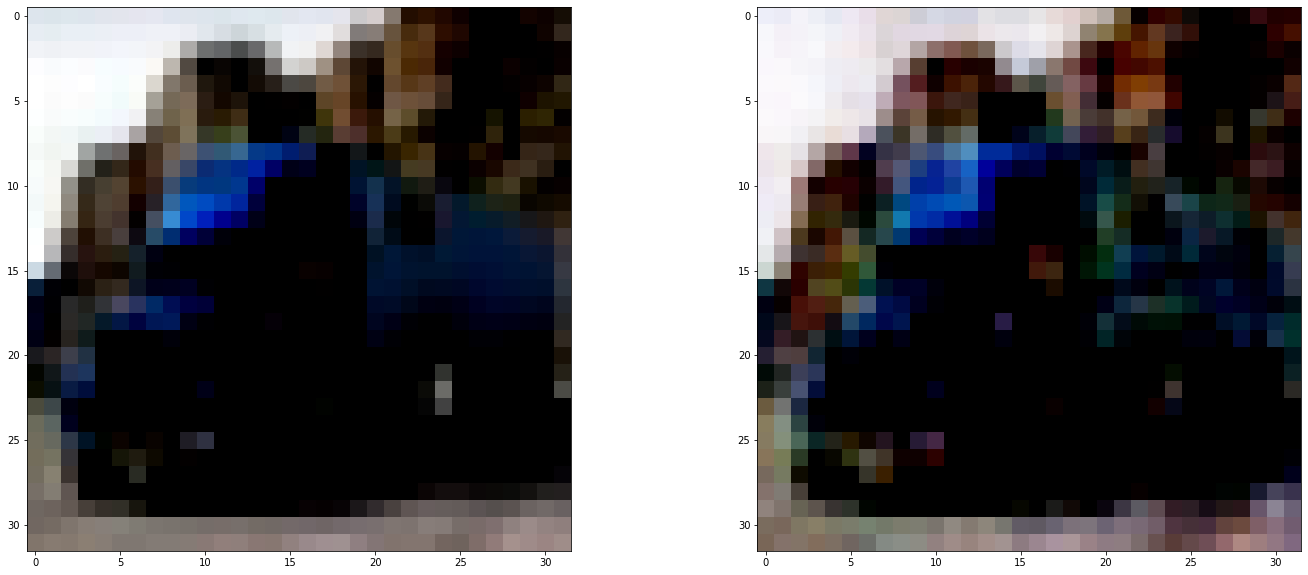

In [ ]:
encoder.eval()
decoder.eval()

figure = plt.figure(figsize = (24, 10))

ax1 = figure.add_subplot(1, 2, 1)
ax2 = figure.add_subplot(1, 2, 2)


ax1.imshow(images[1].astype(np.float64))

img = images_tensor[1].flatten().to(device)

enc = encoder(img)
dec = decoder(enc)

dec = dec.reshape(32, 32, 3)
ax2.imshow((dec.cpu().detach().numpy()).astype(np.float64))

plt.show()

# Выводы
Выполнив данную лаюораторную работу, я изучил строение автоассоциативные сетей с узким горлом и реализовал одну из них, продемонстрировав её работу на датасете CIFAR-10